# Explore here

In [47]:
# Your code here

# Bibliotecas necesarias
import json
import zipfile
import os
import pandas as pd
from PIL import Image
import random



In [48]:
root_path = '/content'

In [49]:
!pip install kaggle
!mkdir ~/.kaggle
!touch '/root/.kaggle/kaggle.json'

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [50]:
## Appi token
api_token = {"username":"mariabottini","key":"b650b216bc3e51dd7fa6e3630cbca6db"}

In [51]:
with open("/root/.kaggle/kaggle.json", "w") as file:
 json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

# Paso 1: Carga del conjunto de datos

In [52]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [53]:
for file in os.listdir():
 if file.endswith(".zip"):
  zip_ref = zipfile.ZipFile(file, "r")
  zip_ref.extractall()
  zip_ref.close()

In [54]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.preprocessing import image
# Define los caminos a los archivos zip
train_zip_path = '/content/train.zip'
test_zip_path = '/content/test1.zip'
# Define los directorios donde se descomprimirán los archivos
train_dir = '/content'
test_dir = '/content'
# Función para descomprimir archivos zip
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
# Descomprime los archivos zip
unzip_file(train_zip_path, train_dir)
unzip_file(test_zip_path, test_dir)

In [55]:
train_dir = "/content/train"
test_dir = "/content/test1"

Paso 2: Visualiza la información de entrada

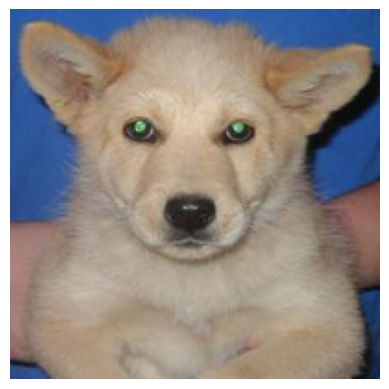

Dimensiones de la imagen: (232, 259)


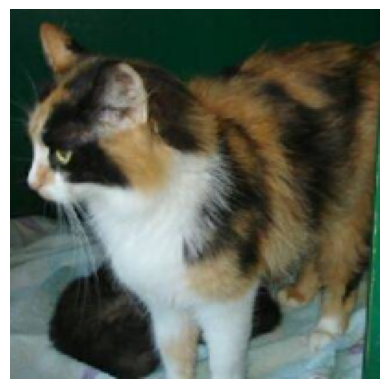

Dimensiones de la imagen: (319, 309)


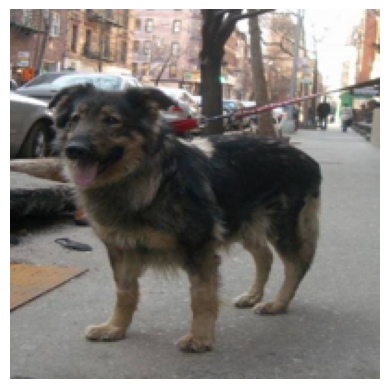

Dimensiones de la imagen: (387, 500)


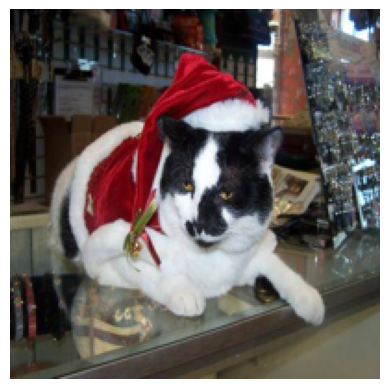

Dimensiones de la imagen: (500, 374)


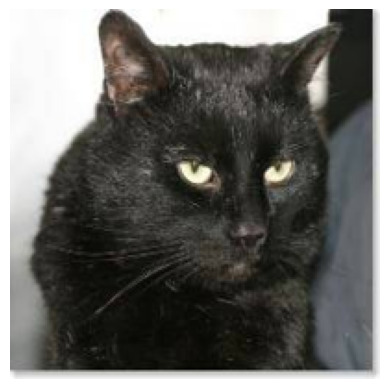

Dimensiones de la imagen: (250, 219)


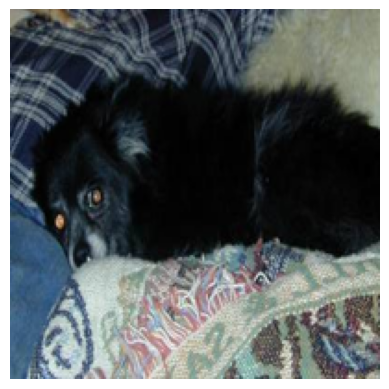

Dimensiones de la imagen: (400, 247)


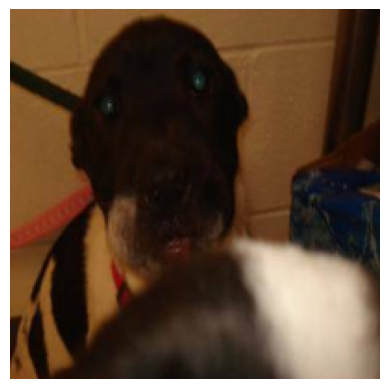

Dimensiones de la imagen: (360, 269)


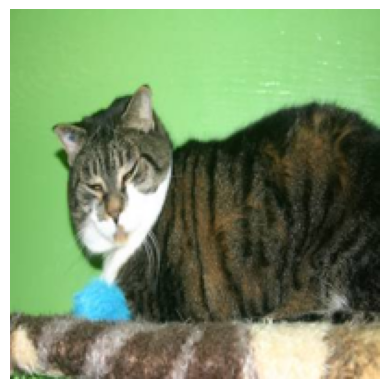

Dimensiones de la imagen: (399, 267)


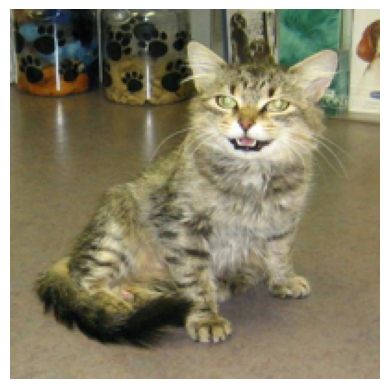

Dimensiones de la imagen: (432, 499)


In [56]:
from PIL import Image
import matplotlib.pyplot as plt

# Obtener una lista de archivos de imagen en el directorio de entrenamiento
train_images = os.listdir(train_dir)

# Función para mostrar una imagen y sus dimensiones
def show_image(image_path):
    image = Image.open(image_path)
    image_resized = image.resize((200, 200))
    plt.imshow(image_resized)
    plt.axis('off')
    plt.show()
    print(f'Dimensiones de la imagen: {image.size}')

# Mostrar las primeras 5 imágenes y sus dimensiones
for i in range(9):
    image_path = os.path.join(train_dir, train_images[i])
    show_image(image_path)


In [57]:
import pandas as pd

In [58]:


def load_images(folder, img_size=(200, 200), sample_count=20, label_filter=None):
    images = []
    labels = []
    filenames = os.listdir(folder)

    if label_filter is not None:
        filenames = [fname for fname in filenames if label_filter in fname]

    random.shuffle(filenames)
    for img in filenames[:sample_count]:
        try:
            img_path = os.path.join(folder, img)
            img_pil = Image.open(img_path)
            img_pil = img_pil.resize(img_size)
            img_np = np.array(img_pil) / 255.0  # Normalize pixel values
            images.append(img_np)
            labels.append(0 if 'cat' in img else 1)
        except Exception as e:
            print(f"Error loading image {img}: {e}")

    return np.array(images), np.array(labels)

In [59]:
def visualize_images(images, labels, sample_count=20):
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()

    for i in range(sample_count):
        axes[i].imshow(images[i])
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

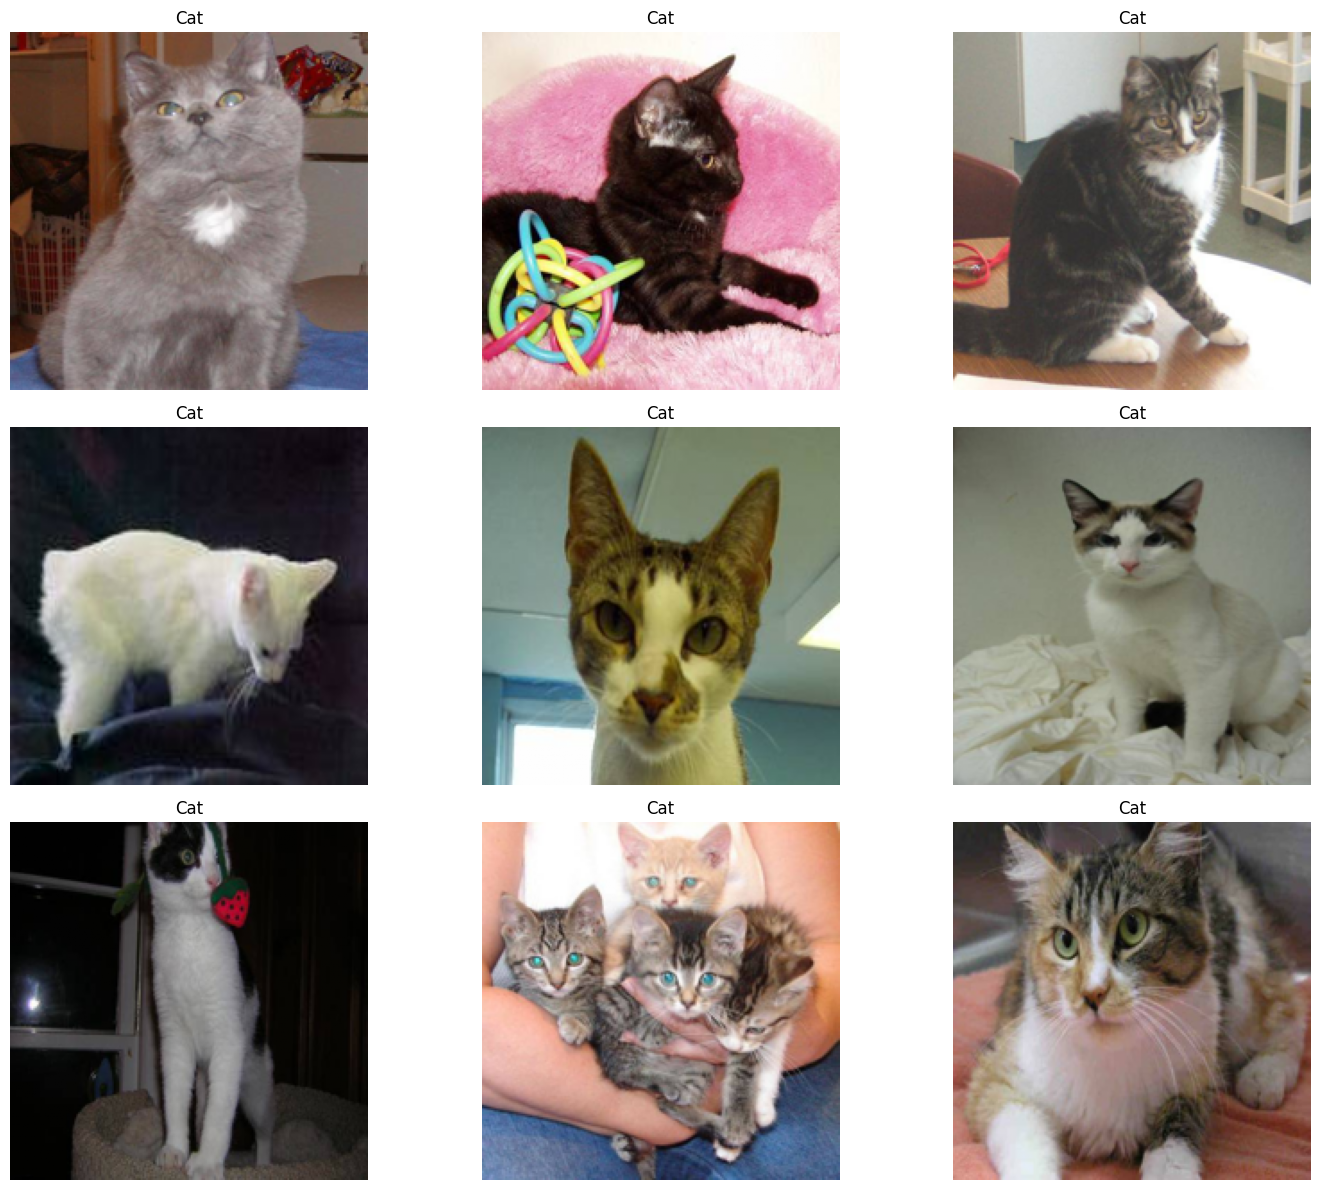

In [63]:
cat_images, cat_labels = load_images(train_dir, sample_count=9, label_filter='cat')
visualize_images(cat_images, cat_labels, sample_count=9)

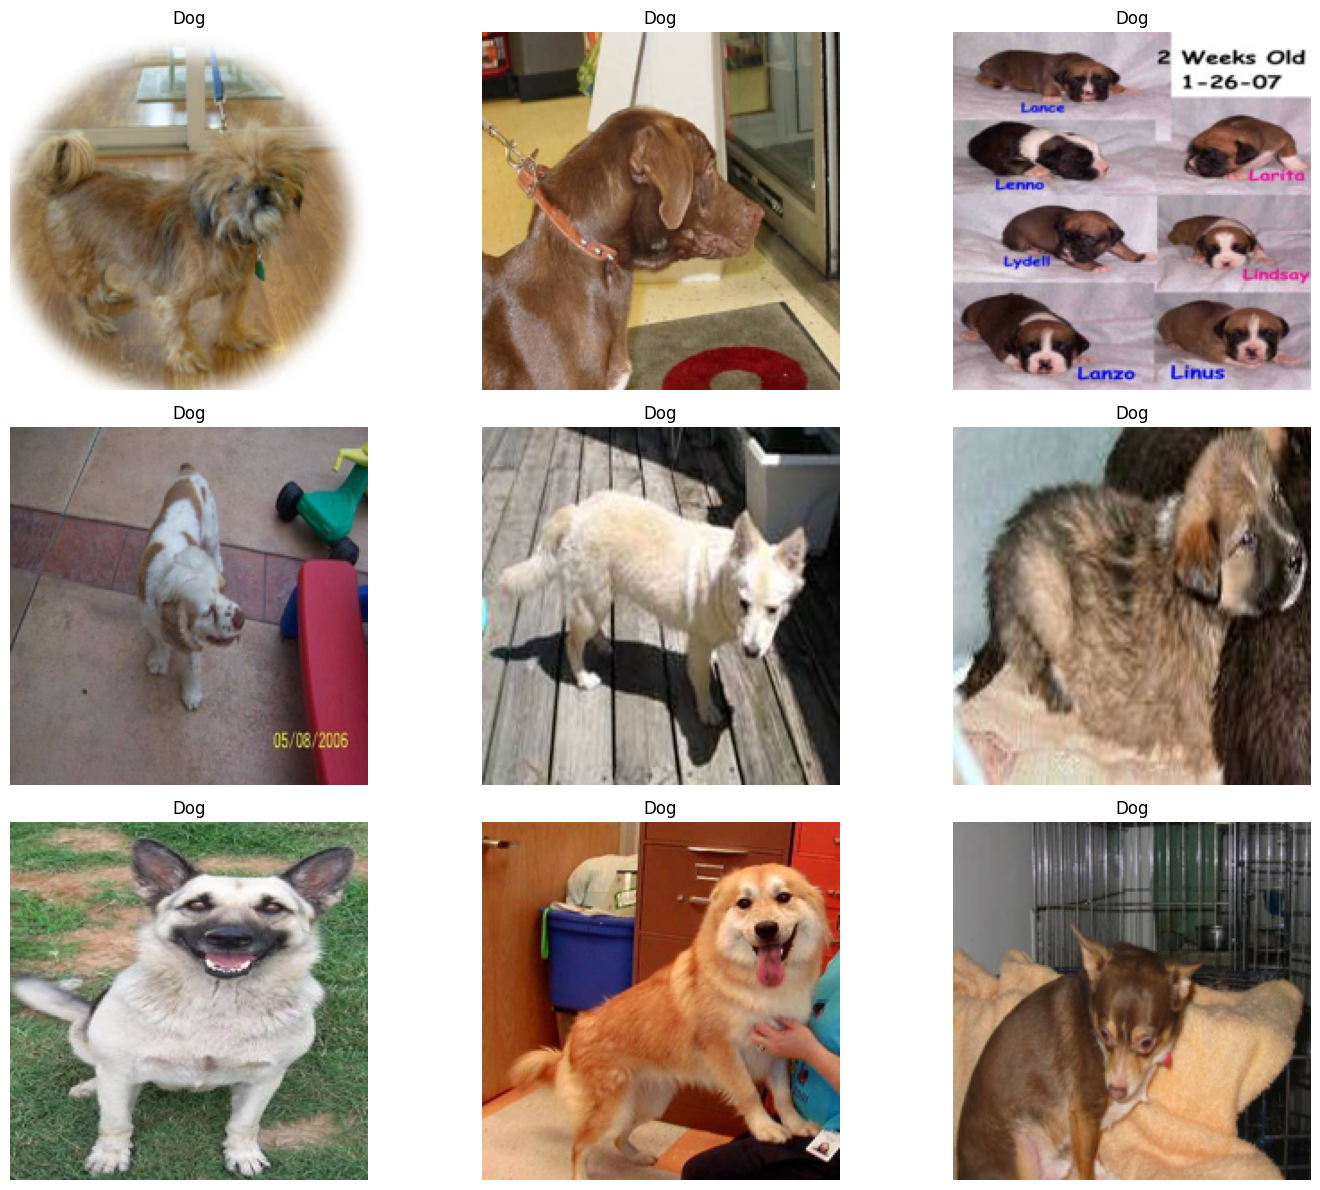

In [64]:
dog_images, dog_labels = load_images(train_dir, sample_count=9, label_filter='dog')
visualize_images(dog_images, dog_labels, sample_count=9)

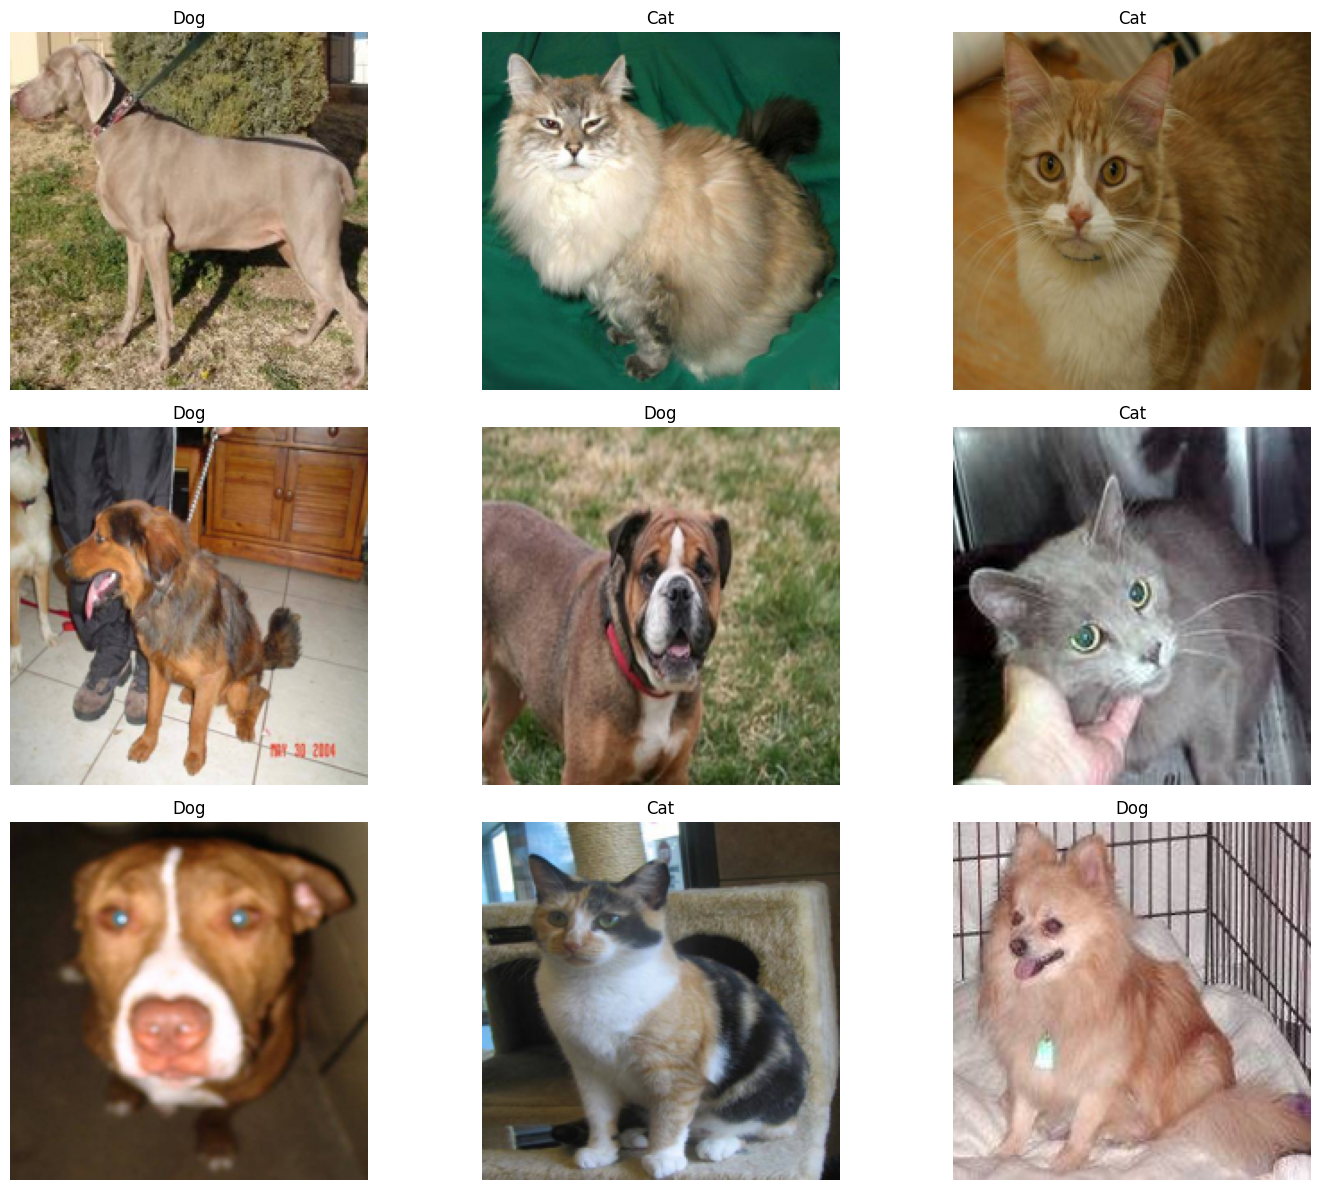

In [65]:
all_images, all_labels = load_images(train_dir, sample_count=9)
visualize_images(all_images, all_labels, sample_count=9)

In [66]:
image_path

'/content/train/cat.9340.jpg'

In [67]:
# Inicializa un DataFrame vacío
data_cat = []

In [68]:
for filename in os.listdir(train_dir):
    if filename.startswith('cat'):
        # Construir la ruta completa del archivo
        image_path = os.path.join(train_dir, filename)

        # Crear un diccionario con los datos de la imagen
        data = {
            'filename': filename,
        }

        # Añadir la fila al DataFrame
        data_cat.append(data)


In [69]:
# Crear el DataFrame a partir de la lista de diccionarios
df = pd.DataFrame(data_cat)

In [70]:
df["label"] = "cat"

In [71]:
# Mostrar el DataFrame
print(df)

           filename label
0       cat.926.jpg   cat
1      cat.8985.jpg   cat
2      cat.3728.jpg   cat
3      cat.8491.jpg   cat
4      cat.9340.jpg   cat
...             ...   ...
12496  cat.9803.jpg   cat
12497  cat.8300.jpg   cat
12498  cat.9555.jpg   cat
12499  cat.1582.jpg   cat
12500   cat.464.jpg   cat

[12501 rows x 2 columns]


In [72]:
# Inicializa un DataFrame vacío
data_dog = []

In [73]:
for filename in os.listdir(train_dir):
    if filename.startswith('dog'):
        # Construir la ruta completa del archivo
        image_path = os.path.join(train_dir, filename)

        # Crear un diccionario con los datos de la imagen
        data = {
            'filename': filename,
        }

        # Añadir la fila al DataFrame
        data_dog.append(data)

In [74]:
# Crear el DataFrame a partir de la lista de diccionarios
df_dog = pd.DataFrame(data_dog)

In [75]:
df_dog["label"] = "dog"

In [76]:
# Mostrar el DataFrame
print(df_dog)

            filename label
0       dog.9885.jpg   dog
1      dog.11259.jpg   dog
2        dog.254.jpg   dog
3       dog.3996.jpg   dog
4       dog.1105.jpg   dog
...              ...   ...
12496    dog.220.jpg   dog
12497   dog.3392.jpg   dog
12498  dog.10166.jpg   dog
12499   dog.3053.jpg   dog
12500    dog.186.jpg   dog

[12501 rows x 2 columns]


In [77]:
import shutil

In [78]:
# # Definir los directorios de origen y destino
# source_dir = 'path/to/source_dir'
# dog_dir = 'path/to/dog_dir'
# cat_dir = 'path/to/cat_dir'

# Crear los directorios de destino si no existen
os.makedirs(dog_dir, exist_ok=True)
os.makedirs(cat_dir, exist_ok=True)


In [79]:
# Mueve las imágenes a los subdirectorios correspondientes
for filename in os.listdir(train_dir):
    # Ruta completa del archivo
    filepath = os.path.join(train_dir, filename)

    # Verifica que sea un archivo y no un directorio
    if os.path.isfile(filepath):
        if filename.startswith('dog'):
            shutil.move(filepath, os.path.join(dog_dir, filename))
        elif filename.startswith('cat'):
            shutil.move(filepath, os.path.join(cat_dir, filename))
print("Imágenes reorganizadas en subdirectorios.")

Imágenes reorganizadas en subdirectorios.


In [80]:
# Directorio de origen
train_dir = r"../content/train"
# Directorios de destino
dog_dir = os.path.join(train_dir, 'dog')
cat_dir = os.path.join(train_dir, 'cat')
# Crea los subdirectorios si no existen
os.makedirs(dog_dir, exist_ok=True)
os.makedirs(cat_dir, exist_ok=True)
# Mueve las imágenes a los subdirectorios correspondientes
for filename in os.listdir(train_dir):
    if filename.startswith('dog'):
        shutil.move(os.path.join(train_dir, filename), os.path.join(dog_dir, filename))
    elif filename.startswith('cat'):
        shutil.move(os.path.join(train_dir, filename), os.path.join(cat_dir, filename))
print("Imágenes reorganizadas en subdirectorios.")


Error: Cannot move a directory '../content/train/dog' into itself '../content/train/dog/dog'.

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [82]:
datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

In [83]:
# Define a few rules for DataGen
train_dir = "../content/train"
image_size = (200, 200)

In [84]:
image_path

'/content/train/dog.186.jpg'

In [85]:
# Define a few rules for DataGen
test_dir = "../content/test1"
image_size = (200, 200)

In [86]:
import tensorflow as tf

In [87]:
from os.path import basename
# Train Data Generation
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    subset = "training",
    image_size = (200,200),
    batch_size = 32,
    seed = 123
    # classes = ["dog", "cat"]
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [88]:
from os.path import basename
# Train Data Generation
test_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    subset = "validation",
    image_size = (200,200),
    batch_size = 32,
    seed = 123
    # classes = ["dog", "cat"]
)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [89]:
class_names = test_data.class_names
print(class_names)

['cat', 'dog']


In [ ]:
# # Test Data Generation
# test_data = datagentest.flow_from_directory(
#     test_dir,
#     target_size = image_size,
#     classes = [""]
# )

Paso 3: Construye una RNA

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten


In [91]:
model = Sequential()
model.add(Conv2D(input_shape = (220,220,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [93]:
# Compile the Model using Adam
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [ ]:
# # Train the Model
# model.fit(train_data, epochs = 1)

Paso 4: Optimiza el modelo anterior

In [94]:

from keras.callbacks import ModelCheckpoint, EarlyStopping

In [95]:
from tensorflow.keras.models import Sequential

In [96]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [97]:
from keras import layers

In [98]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the model
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(2, activation='softmax')  # Output layer for 10 classes
# ])

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(200, 200, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
pip install tensorflow

In [99]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 200, 200, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 100, 100, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 100, 100, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 40000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       5,120,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,143,970 (19.62 MB)

 Trainable params: 5,143,970 (19.62 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# epochs=5
# history = model.fit( train_data,validation_data=test_data, epochs=epochs)

In [101]:
# Set up ModelCheckpoint and EarlyStopping
checkpoint = ModelCheckpoint(
    "/content/models/vgg16_1.keras",
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="max"
)

early = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    verbose=1,
    mode="max"
)

In [102]:
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 10, callbacks = [checkpoint, early])

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5126 - loss: 0.7950
Epoch 1: val_accuracy improved from -inf to 0.54688, saving model to /content/models/vgg16_1.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.5128 - loss: 0.7942 - val_accuracy: 0.5469 - val_loss: 0.6974
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6327 - loss: 0.6491
Epoch 2: val_accuracy improved from 0.54688 to 0.68125, saving model to /content/models/vgg16_1.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6328 - loss: 0.6490 - val_accuracy: 0.6812 - val_loss: 0.5986
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6811 - loss: 0.6020
Epoch 3: val_accuracy improved from 0.68125 to 0.70000, saving model to /content/models/vgg16_1.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6811 - loss: 0.6020 - val_accuracy: 0.7000 - val_loss: 0.5893
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6973 - loss: 0.5867
Epo

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 7: val_accuracy did not improve from 0.73750
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 363ms/step - accuracy: 0.7432 - loss: 0.5232 - val_accuracy: 0.7281 - val_loss: 0.5221
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7400 - loss: 0.5122
Epoch 8: val_accuracy improved from 0.73750 to 0.77500, saving model to /content/models/vgg16_1.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7400 - loss: 0.5122 - val_accuracy: 0.7750 - val_loss: 0.4656
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7547 - loss: 0.5009
Epoch 9: val_accuracy did not improve from 0.77500
100/100 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.7547 - loss: 0.5008 - val_accuracy: 0.7125 - val_loss: 0.5347
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7458 - loss: 0.5113
Epoch 10: val_accuracy improved from 0.77500 to 0.78750, saving model to /content/models/vgg16_1.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.7459 - loss: 0.5111 - va

In [ ]:
# Assuming train_data and test_data are already defined: esta parte es la que no funciona
# history = model.fit(
#     train_data,
#     steps_per_epoch=len(train_data),
#     validation_data=test_data,
#     validation_steps=len(test_data),
#     epochs=3,
#     callbacks=[checkpoint, early]
# )

In [103]:
print(hist.history)

{'accuracy': [0.5334374904632568, 0.6412500143051147, 0.6812499761581421, 0.6881250143051147, 0.7153124809265137, 0.7368749976158142, 0.7425000071525574, 0.7400000095367432, 0.7568749785423279, 0.7565624713897705], 'loss': [0.7149418592453003, 0.6404064297676086, 0.6016424894332886, 0.5906842947006226, 0.5558422207832336, 0.5313608050346375, 0.5259231328964233, 0.5162384510040283, 0.4986504316329956, 0.4967593252658844], 'val_accuracy': [0.546875, 0.6812499761581421, 0.699999988079071, 0.628125011920929, 0.737500011920929, 0.737500011920929, 0.7281249761581421, 0.7749999761581421, 0.7124999761581421, 0.7875000238418579], 'val_loss': [0.6973792910575867, 0.5985591411590576, 0.5893439650535583, 0.6197234392166138, 0.5351460576057434, 0.5408702492713928, 0.5221318006515503, 0.4656425416469574, 0.5346941351890564, 0.46640172600746155]}


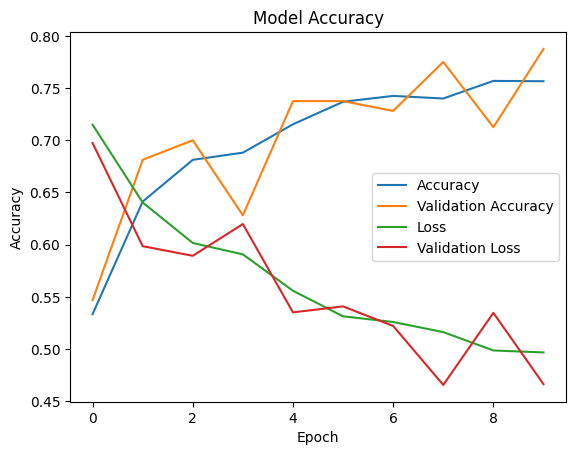

In [104]:
# Comprobar la exactitud de los datos

# Trazar los resultados
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configurar el diseño del gráfico
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Trazar
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
dog


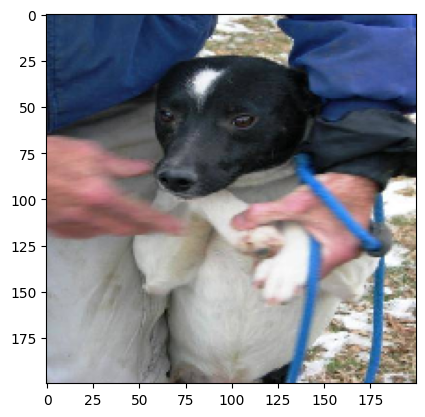

In [105]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("/content/test1/1.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("/content/models/vgg16_1.keras")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

Paso 5: Guarda el modelo